In [1]:
!pip install mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [4]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

In [5]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
mp_drawing_styles = mp.solutions.drawing_styles
draw_specs = mp_drawing.DrawingSpec(thickness=1, circle_radius=2)


In [7]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot (256).png to Screenshot (256).png


In [9]:
img_path = next(iter(uploaded.keys()))

In [10]:
img = cv2.imread(img_path)

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

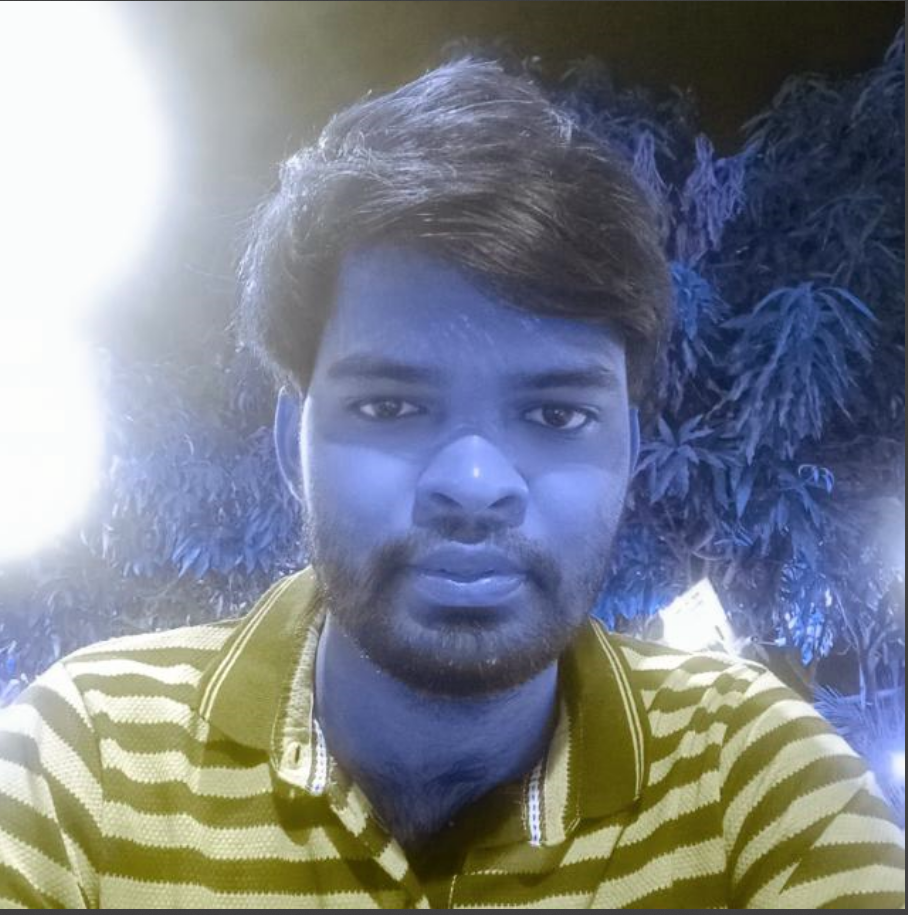

In [12]:
cv2_imshow(img)

In [14]:
def get_landmark(image):
  face_mesh = mp_face_mesh.FaceMesh(static_image_mode = True,max_num_faces =1,refine_landmarks = True,min_detection_confidence=0.5)
  image.flags.writeable = False
  result = face_mesh.process(image)
  landmarks = result.multi_face_landmarks[0].landmark
  return result,landmarks

In [16]:
result,landmark  = get_landmark(img)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [17]:
for face in result.multi_face_landmarks:
  for landmark in face.landmark:
    print('x value',landmark.x)
    print('y value',landmark.y)
    print('z value',landmark.z)

x value 0.5170973539352417
y value 0.6031796932220459
z value -0.044769495725631714
x value 0.5217735767364502
y value 0.5476022958755493
z value -0.09149561077356339
x value 0.5203040242195129
y value 0.563447892665863
z value -0.046414803713560104
x value 0.5092275738716125
y value 0.4931894540786743
z value -0.07158142328262329
x value 0.5227215886116028
y value 0.5308876037597656
z value -0.09802000969648361
x value 0.523508608341217
y value 0.5091070532798767
z value -0.09218844771385193
x value 0.5244086384773254
y value 0.45803016424179077
z value -0.049829501658678055
x value 0.40050995349884033
y value 0.45098942518234253
z value 0.015576831065118313
x value 0.5249133706092834
y value 0.4240301847457886
z value -0.041593074798583984
x value 0.5256386995315552
y value 0.40388745069503784
z value -0.046779464930295944
x value 0.5282851457595825
y value 0.3229019045829773
z value -0.03209562599658966
x value 0.5169016718864441
y value 0.612234890460968
z value -0.0422607213258743

In [57]:

def draw_landmark(image,result):
  image.flags.writeable = True
  mp_drawing = mp.solutions.drawing_utils # Initialize mp_drawing
  if result.multi_face_landmarks:
    for face in result.multi_face_landmarks:
      mp_drawing.draw_landmarks(image,landmark_list = face,
                                landmark_drawing_spec = None,
                                connections = mp_face_mesh.FACEMESH_TESSELATION,
                                connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(image,landmark_list = face,landmark_drawing_spec = None,connections = mp_face_mesh.FACEMESH_CONTOURS,
                                connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_contours_style()
                                )
      # Handle the irises separately with a simple drawing spec
      mp_drawing.draw_landmarks(image, landmark_list=face, connections=mp_face_mesh.FACEMESH_IRISES,
                                landmark_drawing_spec=None,
                                connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1))
       # Use DrawingSpec to define drawing style

  return image # Return the modified image



In [ ]:
def draw_landmark(image,result):
  image.flags.writeable = True
  mp_drawing = mp.solutions.drawing_utils # Initialize mp_drawing
  if result.multi_face_landmarks:
    for face in result.multi_face_landmarks:
      mp_drawing.draw_landmarks(image,landmark_list = face,
                                landmark_drawing_spec = None,
                                connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1)) # Complete the DrawingSpec

  return image # Return the modified image

In [58]:
ann_img = draw_landmark(ann_img,result)

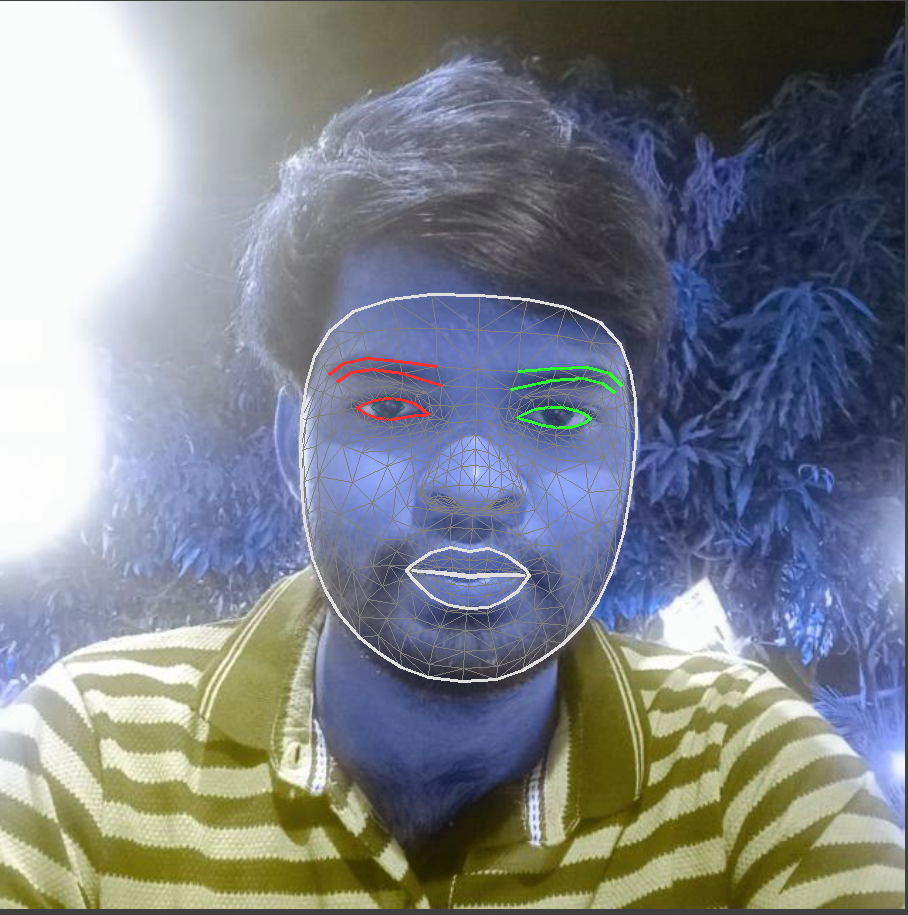

In [59]:
cv2_imshow(ann_img)

In [33]:
ann_img = img.copy()